In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df__train_unclean = pd.read_csv("data/training_data.csv")
print(len(df__train_unclean))
df__train_unclean.head()

614


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df__train_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#number of cells with null values
df__train_unclean.isnull().values.sum()

149

In [5]:
#dropping rows that contain null values
print("New non-null dataframe size:",len(df__train_unclean.dropna()))
df_train = df__train_unclean.dropna()

New non-null dataframe size: 480


In [6]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
#check for number of uniques values in each features
features_list = df_train.columns
for feature in features_list[1:]:
    print(feature,df_train[feature].unique().size)
features_list

Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 405
CoapplicantIncome 232
LoanAmount 186
Loan_Amount_Term 9
Credit_History 2
Property_Area 3
Loan_Status 2


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df_train = pd.get_dummies(df_train, columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area' ])

one_hot_encoded_feature_list = df_train.columns
print(one_hot_encoded_feature_list)
df_train.head()

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,False,True,False,...,True,False,False,True,False,True,False,True,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,False,True,False,...,False,False,False,True,False,False,True,False,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,...,False,False,False,False,True,True,False,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,False,True,True,...,False,False,False,True,False,True,False,False,False,True
5,LP001011,5417,4196.0,267.0,360.0,1.0,Y,False,True,False,...,False,True,False,True,False,False,True,False,False,True


In [9]:
#convert load status to numerical data
df_train['Loan_Status'].replace(["N", "Y"],
                        [0, 1], inplace=True)

In [10]:
df_train_label = df_train["Loan_Status"]
df_train.drop("Loan_Status", axis=1, inplace=True)
df_train = df_train.reset_index(drop=True)

In [11]:
new_feature_list = df_train.columns
print(new_feature_list)
print(df_train_label.shape)
df_train

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
(480,)


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001003,4583,1508.0,128.0,360.0,1.0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
1,LP001005,3000,0.0,66.0,360.0,1.0,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
2,LP001006,2583,2358.0,120.0,360.0,1.0,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
3,LP001008,6000,0.0,141.0,360.0,1.0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,LP001011,5417,4196.0,267.0,360.0,1.0,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,2900,0.0,71.0,360.0,1.0,True,False,True,False,...,False,False,False,True,False,True,False,True,False,False
476,LP002979,4106,0.0,40.0,180.0,1.0,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
477,LP002983,8072,240.0,253.0,360.0,1.0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
478,LP002984,7583,0.0,187.0,360.0,1.0,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True


In [12]:
#test dataset
df_test_unclean = pd.read_csv("data/test_data.csv")
df_test_unclean.shape

(367, 12)

In [13]:
df_test = df_test_unclean.dropna()
df_test.shape

(289, 12)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_train[new_feature_list[1:]], df_train_label, test_size=0.3, shuffle=True, random_state=137)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_predict = clf.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
acc = accuracy_score(y_predict,y_test)
print(f"{round(acc*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.93      0.46      0.61        57
           1       0.73      0.98      0.84        87

    accuracy                           0.77       144
   macro avg       0.83      0.72      0.72       144
weighted avg       0.81      0.77      0.75       144

77.08% Accurate


In [19]:
cm_Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
cm_Random_Forest.to_csv("Random Forest.csv")
cm = confusion_matrix(cm_Random_Forest['prediction'], cm_Random_Forest['y_test'], labels=clf.classes_)

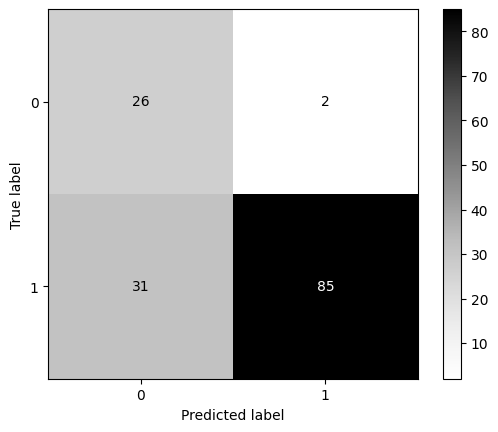

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Greys')

In [21]:
#Try with xgboost

from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        57
           1       0.75      0.89      0.81        87

    accuracy                           0.75       144
   macro avg       0.75      0.71      0.72       144
weighted avg       0.75      0.75      0.74       144

75.0% Accurate


In [22]:
cm = confusion_matrix(y_predict, y_test, labels=clf.classes_)

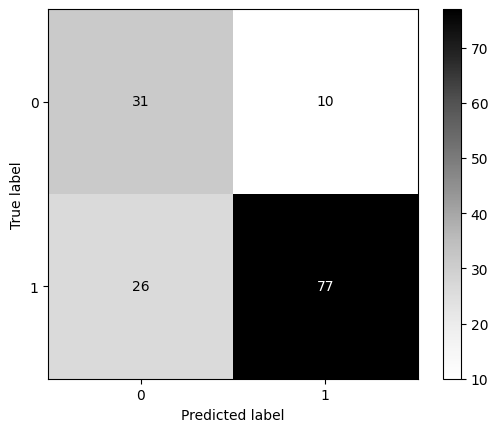

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Greys')

In [24]:
#testing phase
df_test = df_test.reset_index(drop=True)

In [25]:
df_test = pd.get_dummies(df_test, columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area' ])

In [26]:
predicted_load_status = clf.predict(df_test[df_test.columns[1:]])
print(predicted_load_status.__len__())
num_approved_loans = predicted_load_status.sum()
num_denied_loans = len(predicted_load_status) - num_approved_loans

289


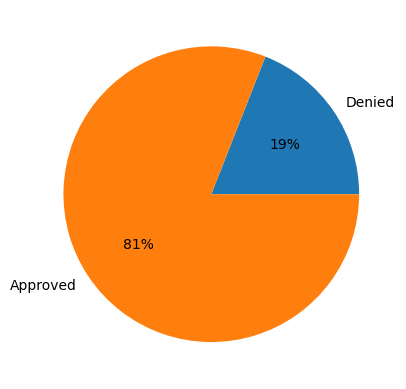

In [27]:
plt.pie([num_denied_loans,num_approved_loans ], labels=["Denied","Approved"], autopct='%.0f%%')
plt.show()

In [ ]:
#TEST